<h1 align=center><font size = 6>Capstone Project: A guide for foodies in Lima</font></h1>

<img src="https://larazon.pe/wp-content/uploads/2020/01/comidaperuana1.jpg">

## 1. Download and explore dataset

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

### 1.1. Lima districts data

In order to explore restaurants in each district of Lima, we need a dataset that contains geographic information at district level as well as the the latitude and logitude coordinates of each one. 

We are able to find this dataset for free on the following link:  
http://webinei.inei.gob.pe:8080/sisconcode/proyecto/index.htm?proyectoTitulo=UBIGEO&proyectoId=3  

For my convenience, I downloaded the file as .csv and placed it on my github repository: https://raw.githubusercontent.com/Hidemi-km/Capstone_Project/master/geodir-ubigeo-inei.csv

Next, let's load the data and take a look at it!


In [2]:
peru_data=pd.read_csv('https://raw.githubusercontent.com/Hidemi-km/Capstone_Project/master/geodir-ubigeo-inei.csv')
peru_data.head()

,Ubigeo,Distrito,Provincia,Departamento,Poblacion,Superficie,Y,X
0,10101,Chachapoyas,Chachapoyas,Amazonas,29171,153.78,-6.2294,-77.8714
1,10102,Asuncion,Chachapoyas,Amazonas,288,25.71,-6.0317,-77.7122
2,10103,Balsas,Chachapoyas,Amazonas,1644,357.09,-6.8375,-78.0214
3,10104,Cheto,Chachapoyas,Amazonas,591,56.97,-6.2558,-77.7003
4,10105,Chiliquin,Chachapoyas,Amazonas,687,143.43,-6.0778,-77.7392


In [3]:
peru_data.shape

(1874, 8)

Let's rename the columns so that they make sense. Then, clean the dataset to remove a few unnecessary columns and rows.

In [4]:
peru_data.rename(columns={'Ubigeo':'Código','Y':'Latitud', 'X':'Longitud'}, inplace=True)
peru_data=peru_data.drop(columns=['Poblacion'])
peru_data.columns

Index(['Código', 'Distrito', 'Provincia', 'Departamento', 'Superficie',
       'Latitud', 'Longitud'],
      dtype='object')

In [5]:
lima_data=peru_data[peru_data['Provincia']=='Lima']

In [6]:
lima_data

,Código,Distrito,Provincia,Departamento,Superficie,Latitud,Longitud
1280,150101,Lima,Lima,Lima,21.98,-12.0467,-77.0322
1281,150102,Ancon,Lima,Lima,285.45,-11.7764,-77.1703
1282,150103,Ate,Lima,Lima,77.72,-12.0256,-76.9242
1283,150104,Barranco,Lima,Lima,3.33,-12.1494,-77.0247
1284,150105,Breña,Lima,Lima,3.22,-12.0567,-77.0536
1285,150106,Carabayllo,Lima,Lima,303.31,-11.8583,-77.0419
1286,150107,Chaclacayo,Lima,Lima,39.50,-11.9783,-76.7642
1287,150108,Chorrillos,Lima,Lima,38.94,-12.1742,-77.0247
1288,150109,Cieneguilla,Lima,Lima,240.33,-12.1178,-76.8125
1289,150110,Comas,Lima,Lima,48.75,-11.9500,-77.0500


#### Use geopy library to get the latitude and longitude values of Peru.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>peru_explorer</em>, as shown below.

In [7]:
address = 'Lima, PE'

geolocator = Nominatim(user_agent="peru_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Peru are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Peru are -12.0621065, -77.0365256.


#### Create a map to visualize geographic details of Lima and its districts.

In [8]:
map_peru = folium.Map(location=[latitude, longitude], zoom_start=8)

for lat, lng, district, province in zip(lima_data['Latitud'], lima_data['Longitud'], lima_data['Distrito'], lima_data['Provincia']):
    label = '{}, {}'.format(district, province)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_peru)  
    
map_peru

### 1.2. Foursquare location data

We are going to start utilizing the Foursquare API to explore the districts and segment them.

In [9]:
CLIENT_ID = 'UOCBTI5YEQ2ZMCODCKJJSJWBG0HTDKKP0KENGP35FREIT5V4' 
CLIENT_SECRET = 'DRQ3EVNHCF234SX4FC0AFJGGNYPBRUJJLRVN01M2CXRMLQWH' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UOCBTI5YEQ2ZMCODCKJJSJWBG0HTDKKP0KENGP35FREIT5V4
CLIENT_SECRET:DRQ3EVNHCF234SX4FC0AFJGGNYPBRUJJLRVN01M2CXRMLQWH


Let's get the top 100 venues within a radius of 1000 meters


In [43]:
RADIUS=1000
LIMIT=100

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
lima_venues = getNearbyVenues(names=lima_data['Distrito'],
                                   latitudes=lima_data['Latitud'],
                                   longitudes=lima_data['Longitud'],
                                  )

Lima
Ancon
Ate
Barranco
Breña
Carabayllo
Chaclacayo
Chorrillos
Cieneguilla
Comas
El Agustino
Independencia
Jesus Maria
La Molina
La Victoria
Lince
Los Olivos
Lurigancho
Lurin
Magdalena del Mar
Pueblo Libre
Miraflores
Pachacamac
Pucusana
Puente Piedra
Punta Hermosa
Punta Negra
Rimac
San Bartolo
San Borja
San Isidro
San Juan de Lurigancho
San Juan de Miraflores
San Luis
San Martin de Porres
San Miguel
Santa Anita
Santa Maria del Mar
Santa Rosa
Santiago de Surco
Surquillo
Villa El Salvador
Villa Maria del Triunfo


In [46]:
lima_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lima,-12.0467,-77.0322,Casa Bernardo O'Higgins,-12.047588,-77.032498,Art Gallery
1,Lima,-12.0467,-77.0322,Plaza Mayor de Lima,-12.045983,-77.030565,Plaza
2,Lima,-12.0467,-77.0322,Convento Santo Domingo,-12.044085,-77.031437,Monastery
3,Lima,-12.0467,-77.0322,Palacio de Torre Tagle,-12.048610,-77.029457,Historic Site
4,Lima,-12.0467,-77.0322,Teatro Municipal de Lima,-12.045770,-77.034839,Theater


We are interested only in restaurants so let's create a dataframe with only venues that have the word "Restaurant" in "Venue Category".



In [47]:
restaurants_venues= lima_venues[lima_venues['Venue Category'].str.contains('Restaurant')]
restaurants_venues.reset_index(drop=True)
restaurants_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,Lima,-12.0467,-77.0322,Tanta,-12.045269,-77.031490,Peruvian Restaurant
18,Lima,-12.0467,-77.0322,Olamo Terraza,-12.046480,-77.030799,South American Restaurant
20,Lima,-12.0467,-77.0322,Hanna,-12.048474,-77.033224,Restaurant
22,Lima,-12.0467,-77.0322,Avellaneda' s Restaurant,-12.046282,-77.032920,Restaurant
26,Lima,-12.0467,-77.0322,Al Sazón de Walter,-12.047799,-77.033240,Restaurant


In [91]:
top5_venues = restaurants_venues['Venue Category'].value_counts()[0:5].to_frame(name='Frequency')
top5_venues=top5_venues.reset_index()
top5_venues.rename(index=str, columns={'index': 'Category'}, inplace=True)
top5_cat_venues=top5_venues['Category']
top5_venues

,Category,Frequency
0,Seafood Restaurant,124
1,Peruvian Restaurant,87
2,Restaurant,76
3,Chinese Restaurant,53
4,Italian Restaurant,26


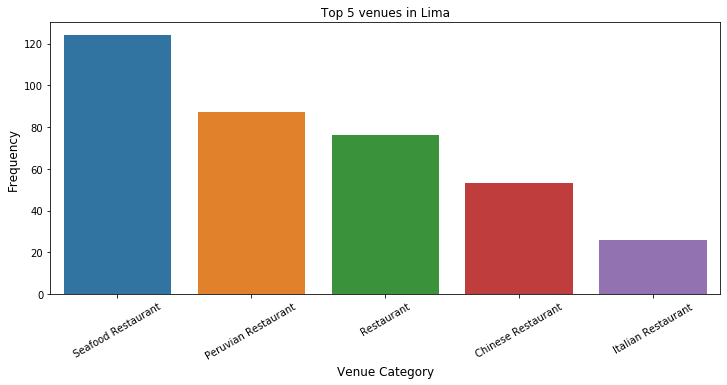

In [49]:
import seaborn as sns
fig = plt.figure(figsize=(12,5))
s=sns.barplot(x="Category", y="Frequency", data=top5_venues)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Top 5 venues in Lima', fontsize=12)
plt.xlabel("Venue Category", fontsize=12)
plt.ylabel ("Frequency", fontsize=12)
plt.show()

<img src="https://s03.s3c.es/imag/_v0/770x420/7/9/0/700x420_ceviche770.jpg">

## 2. Explore each district

In [50]:
district_venues = restaurants_venues['District'].value_counts().to_frame(name='Frequency')
district_venues=district_venues.reset_index()
district_venues.rename(index=str, columns={'index': 'District'}, inplace=True)
district_venues

,District,Frequency
0,Lince,42
1,Jesus Maria,41
2,San Isidro,34
3,San Borja,28
4,Lima,27
5,Pueblo Libre,26
6,Miraflores,25
7,Chorrillos,25
8,Barranco,23
9,Surquillo,23


In [51]:
# one hot encoding
lima_onehot = pd.get_dummies(restaurants_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lima_onehot['District'] = restaurants_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [lima_onehot.columns[-1]] + list(lima_onehot.columns[:-1])
lima_onehot = lima_onehot[fixed_columns]

lima_onehot.head()

,District,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Belgian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,...,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
14,Lima,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Lima,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
20,Lima,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,Lima,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Lima,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
lima_onehot.shape

(486, 35)

Next, let's group rows by district and by taking the mean of the frequency of occurrence of each category


In [53]:
district_groupby =lima_onehot.groupby('District').mean().reset_index()
district_groupby

,District,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Belgian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,...,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Ancon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Ate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Barranco,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.000000,...,0.000000,0.217391,0.000000,0.043478,0.000000,0.00,0.000000,0.000000,0.000000,0.043478
3,Breña,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,...,0.000000,0.222222,0.111111,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Carabayllo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
5,Chaclacayo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Chorrillos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.760000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Cieneguilla,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
8,Comas,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,Independencia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.200000,0.000000,0.000000,0.000000


In [54]:
district_groupby.shape

(39, 35)

Let's print each district along with the top 5 most common venues

In [55]:
num_top_venues = 5

for hood in district_groupby['District']:
    print("----"+hood+"----")
    temp = district_groupby[district_groupby['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ancon----
                     venue  freq
0       Seafood Restaurant   1.0
1      American Restaurant   0.0
2       Mexican Restaurant   0.0
3  New American Restaurant   0.0
4      Peruvian Restaurant   0.0


----Ate----
                     venue  freq
0               Restaurant  0.67
1       Seafood Restaurant  0.33
2      American Restaurant  0.00
3       Mexican Restaurant  0.00
4  New American Restaurant  0.00


----Barranco----
                           venue  freq
0                     Restaurant  0.30
1             Seafood Restaurant  0.22
2            Peruvian Restaurant  0.17
3  Vegetarian / Vegan Restaurant  0.04
4             Chinese Restaurant  0.04


----Breña----
                       venue  freq
0                 Restaurant  0.28
1         Seafood Restaurant  0.22
2  South American Restaurant  0.11
3        Peruvian Restaurant  0.11
4       Fast Food Restaurant  0.11


----Carabayllo----
                 venue  freq
0  Peruvian Restaurant   0.5
1           Restau

Let's put that into a pandas dataframe

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each district

In [77]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = district_groupby['District']

for ind in np.arange(district_groupby.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(district_groupby.iloc[ind, :], num_top_venues)

district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ancon,Seafood Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
1,Ate,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Fast Food Restaurant
2,Barranco,Restaurant,Seafood Restaurant,Peruvian Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant
3,Breña,Restaurant,Seafood Restaurant,South American Restaurant,Fast Food Restaurant,Peruvian Restaurant
4,Carabayllo,Peruvian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,French Restaurant
5,Chaclacayo,Chinese Restaurant,Restaurant,Peruvian Restaurant,South American Restaurant,Fast Food Restaurant
6,Chorrillos,Seafood Restaurant,Restaurant,Peruvian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant
7,Cieneguilla,Restaurant,Cajun / Creole Restaurant,Peruvian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant
8,Comas,American Restaurant,Asian Restaurant,Seafood Restaurant,Italian Restaurant,Argentinian Restaurant
9,Independencia,Fast Food Restaurant,Restaurant,Tex-Mex Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant


## 3. Clustering districts

Run *k*-means to cluster the neighborhood into 5 clusters.

In [78]:
kclusters = 5

lima_clustering = district_groupby.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lima_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 4, 4, 0, 0, 1, 0, 4, 4], dtype=int32)

In [81]:
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
lima_merged = lima_data
lima_merged = lima_merged.join(district_venues_sorted.set_index('District'), on='Distrito')
lima_merged = lima_merged.dropna()
lima_merged.reset_index(drop=True)

lima_merged.head()

,Código,Distrito,Provincia,Departamento,Superficie,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1280,150101,Lima,Lima,Lima,21.98,-12.0467,-77.0322,4.0,Restaurant,Chinese Restaurant,Peruvian Restaurant,Seafood Restaurant,Japanese Restaurant
1281,150102,Ancon,Lima,Lima,285.45,-11.7764,-77.1703,1.0,Seafood Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
1282,150103,Ate,Lima,Lima,77.72,-12.0256,-76.9242,3.0,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Fast Food Restaurant
1283,150104,Barranco,Lima,Lima,3.33,-12.1494,-77.0247,4.0,Restaurant,Seafood Restaurant,Peruvian Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant
1284,150105,Breña,Lima,Lima,3.22,-12.0567,-77.0536,4.0,Restaurant,Seafood Restaurant,South American Restaurant,Fast Food Restaurant,Peruvian Restaurant


In [82]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lima_merged['Latitud'], lima_merged['Longitud'], lima_merged['Distrito'], lima_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Clusters examination

### 4.1. Cluster 1

In [83]:
lima_merged.loc[lima_merged['Cluster Labels'] == 0]


,Código,Distrito,Provincia,Departamento,Superficie,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1285,150106,Carabayllo,Lima,Lima,303.31,-11.8583,-77.0419,0.0,Peruvian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,French Restaurant
1286,150107,Chaclacayo,Lima,Lima,39.50,-11.9783,-76.7642,0.0,Chinese Restaurant,Restaurant,Peruvian Restaurant,South American Restaurant,Fast Food Restaurant
1288,150109,Cieneguilla,Lima,Lima,240.33,-12.1178,-76.8125,0.0,Restaurant,Cajun / Creole Restaurant,Peruvian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant
1292,150113,Jesus Maria,Lima,Lima,4.57,-12.0697,-77.0450,0.0,Peruvian Restaurant,Chinese Restaurant,Seafood Restaurant,Restaurant,South American Restaurant
1298,150119,Lurin,Lima,Lima,180.26,-12.2686,-76.8847,0.0,Peruvian Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,French Restaurant,Fast Food Restaurant
1302,150123,Pachacamac,Lima,Lima,160.23,-12.2286,-76.8597,0.0,Peruvian Restaurant,Italian Restaurant,Restaurant,Japanese Restaurant,French Restaurant
1307,150128,Rimac,Lima,Lima,11.87,-12.0294,-77.0436,0.0,Peruvian Restaurant,Fast Food Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant
1314,150135,San Martin de Porres,Lima,Lima,36.82,-12.0303,-77.0469,0.0,Peruvian Restaurant,Chinese Restaurant,Restaurant,Latin American Restaurant,Vegetarian / Vegan Restaurant
1315,150136,San Miguel,Lima,Lima,10.72,-12.0900,-77.0864,0.0,Peruvian Restaurant,Chinese Restaurant,Latin American Restaurant,Seafood Restaurant,Comfort Food Restaurant


### 4.2. Cluster 2

In [84]:
lima_merged.loc[lima_merged['Cluster Labels'] == 1]


,Código,Distrito,Provincia,Departamento,Superficie,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1281,150102,Ancon,Lima,Lima,285.45,-11.7764,-77.1703,1.0,Seafood Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
1287,150108,Chorrillos,Lima,Lima,38.94,-12.1742,-77.0247,1.0,Seafood Restaurant,Restaurant,Peruvian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant
1297,150118,Lurigancho,Lima,Lima,236.47,-11.9372,-76.7036,1.0,Latin American Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,French Restaurant
1305,150126,Punta Hermosa,Lima,Lima,119.50,-12.3375,-76.8258,1.0,Seafood Restaurant,Restaurant,Italian Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant
1316,150137,Santa Anita,Lima,Lima,10.69,-12.0433,-76.9850,1.0,Seafood Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
1322,150143,Villa Maria del Triunfo,Lima,Lima,70.57,-12.1572,-76.9528,1.0,Seafood Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant


### 4.3. Cluster 3

In [85]:
lima_merged.loc[lima_merged['Cluster Labels'] == 2]


,Código,Distrito,Provincia,Departamento,Superficie,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1303,150124,Pucusana,Lima,Lima,37.39,-12.4825,-76.7964,2.0,Italian Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,French Restaurant,Fast Food Restaurant
1317,150138,Santa Maria del Mar,Lima,Lima,9.81,-12.4092,-76.7758,2.0,Italian Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,French Restaurant,Fast Food Restaurant


### 4.4. Cluster 4

In [86]:
lima_merged.loc[lima_merged['Cluster Labels'] == 3]


,Código,Distrito,Provincia,Departamento,Superficie,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1282,150103,Ate,Lima,Lima,77.72,-12.0256,-76.9242,3.0,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Fast Food Restaurant
1306,150127,Punta Negra,Lima,Lima,130.50,-12.3661,-76.7947,3.0,Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,French Restaurant,Fast Food Restaurant


### 4.5. Cluster 5

In [87]:
lima_merged.loc[lima_merged['Cluster Labels'] == 4]


,Código,Distrito,Provincia,Departamento,Superficie,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1280,150101,Lima,Lima,Lima,21.98,-12.0467,-77.0322,4.0,Restaurant,Chinese Restaurant,Peruvian Restaurant,Seafood Restaurant,Japanese Restaurant
1283,150104,Barranco,Lima,Lima,3.33,-12.1494,-77.0247,4.0,Restaurant,Seafood Restaurant,Peruvian Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant
1284,150105,Breña,Lima,Lima,3.22,-12.0567,-77.0536,4.0,Restaurant,Seafood Restaurant,South American Restaurant,Fast Food Restaurant,Peruvian Restaurant
1289,150110,Comas,Lima,Lima,48.75,-11.9500,-77.0500,4.0,American Restaurant,Asian Restaurant,Seafood Restaurant,Italian Restaurant,Argentinian Restaurant
1291,150112,Independencia,Lima,Lima,14.56,-12.0008,-77.0522,4.0,Fast Food Restaurant,Restaurant,Tex-Mex Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
1294,150115,La Victoria,Lima,Lima,8.74,-12.0653,-77.0308,4.0,Seafood Restaurant,Chinese Restaurant,Peruvian Restaurant,Cantonese Restaurant,Latin American Restaurant
1295,150116,Lince,Lima,Lima,3.03,-12.0811,-77.0306,4.0,Seafood Restaurant,Peruvian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant
1296,150117,Los Olivos,Lima,Lima,18.25,-11.9828,-77.0694,4.0,Seafood Restaurant,Peruvian Restaurant,Chinese Restaurant,Italian Restaurant,Latin American Restaurant
1299,150120,Magdalena del Mar,Lima,Lima,3.61,-12.0967,-77.0747,4.0,Chinese Restaurant,Seafood Restaurant,Latin American Restaurant,Peruvian Restaurant,Italian Restaurant
1300,150121,Pueblo Libre,Lima,Lima,4.38,-12.0733,-77.0631,4.0,Chinese Restaurant,Japanese Restaurant,Restaurant,Sushi Restaurant,Dim Sum Restaurant
